In [2]:
from sklearn.metrics import precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt
import pandas as pd


Receiver Operating Characteristic (ROC) curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.
Therefore, we don't use ROC curve in this case, assuming that the anomalies are rare.

In [3]:
df = pd.read_csv('data/prediction_results.csv')
y_test, y_score = df['GroundTruth'], df['Confidence']

<AxesSubplot:>

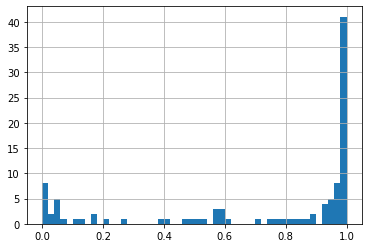

In [9]:
y_score.hist(bins=50)

In [ ]:
# Scatter plot

plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.show()

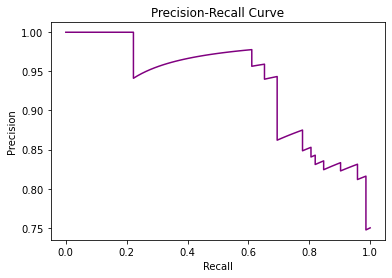

In [9]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [11]:
# calculate F1 score
# f1 = f1_score(y_test, prediction)

In [13]:
# calculate precision-recall AUC
auc = auc(recall, precision)

In [14]:
auc

0.9326116203444679